# Pandas II - working with data

Last time, we met some of the basic data structures in pandas.

Basic pandas objects:

* Index
* Series
* Data Frame

We also learned how these three things are related. Namely, we can think of a pandas `DataFrame` as being composed of several *named columns*, each of which is like a `Series`, and a special `Index` column along the left-hand side.

Let's build a little data frame and take look at it to remind ourselves of this structure. We'll build one similar to a data frame we played with last time.

It will have 5 columns co

First, import `pandas` because of course, and `numpy` in order to simulate some data.

In [1]:
import pandas as pd    
import numpy as np     # to make some simulated data

Now we can make the data frame. It will have 4 variables of cardiovascular data for a number of patients that we can specify. Because a pandas `DataFrame` has that special index column, we'll just use it to correspond to "patient ID" instead of making a fifth variable.

In [2]:
num_patients = 10    # specify the number of patients

# make some simulated data 
sys_bp = np.int64(125 + 5*np.random.randn(num_patients,))
dia_bp = np.int64(80 + 5*np.random.randn(num_patients,))
b_oxy = np.round(98.5 + 0.3*np.random.randn(num_patients,), 2)
pulse = np.int64(65 + 2*np.random.randn(num_patients,))

# Make a dictionary with a "key" for each variable name, and 
# the "values" being the num_patients long data vectors
df_dict = {'systolic BP' : sys_bp,
           'diostolic BP' : dia_bp,
           'blood oxygenation' : b_oxy,
           'pulse rate' : pulse
           }
    
our_df = pd.DataFrame(df_dict)    # Now make a data frame out of the dictionary

And now lets look at it.

In [3]:
our_df

,systolic BP,diostolic BP,blood oxygenation,pulse rate
0,127,82,98.45,65
1,127,85,98.50,64
2,118,77,98.49,65
3,126,81,98.61,62
4,121,82,98.41,63
5,119,82,98.06,67
6,122,87,98.83,65
7,120,79,98.92,66
8,118,79,98.11,67
9,123,73,98.49,63


Now we can see the nice structure of the `DataFrame` object. We have four columns corresponding to our measurement variables, and each row is an "observation" which, in the case, corresponds to an individual patient.

To appreciate some of the features of a pandas `DataFrame`, let's compare it with a numpy `Array` holding the same information. (Which we can do because we're only dealing with numbers here - one of the main features of a pandas data frame is that it can hold non-numeric information too).

In [4]:
our_array = np.transpose(np.vstack((sys_bp, dia_bp, b_oxy, pulse)))
our_array

array([[127.  ,  82.  ,  98.45,  65.  ],
       [127.  ,  85.  ,  98.5 ,  64.  ],
       [118.  ,  77.  ,  98.49,  65.  ],
       [126.  ,  81.  ,  98.61,  62.  ],
       [121.  ,  82.  ,  98.41,  63.  ],
       [119.  ,  82.  ,  98.06,  67.  ],
       [122.  ,  87.  ,  98.83,  65.  ],
       [120.  ,  79.  ,  98.92,  66.  ],
       [118.  ,  79.  ,  98.11,  67.  ],
       [123.  ,  73.  ,  98.49,  63.  ]])

We can see here that our array, `our_array`, contains exactly the same information as our dataframe, `our_df`. There are 3 main differences between the two:

* they have different verbs – things they know how to do 
* we have more ways to access the information in a data frame
* the data frame could contain non-numeric information (e.g. gender) if we wanted

## Verbs

Let's look at some verbs. Intuitively, it seems like the should both know how to take a mean. Let's see.

In [5]:
our_array.mean()

91.49674999999999

So the numpy array does indeed know how to take the mean of itself, but it takes the mean of the entire array by default, which is not very useful in this case. If we want the mean of each variable, we have to specify that we want the means of the columns (i.e. row-wise means).

In [6]:
our_array.mean(axis=0)

array([122.1  ,  80.7  ,  98.487,  64.7  ])

But look what happens if we ask for the mean of our data frame:

In [7]:
our_df.mean()

systolic BP          122.100
diostolic BP          80.700
blood oxygenation     98.487
pulse rate            64.700
dtype: float64

Visually, that is much more useful! We have the mean of each of our variables, nicely labled by the variable name.

Data frames can also `describe()` themselves.

In [8]:
our_df.describe()

,systolic BP,diostolic BP,blood oxygenation,pulse rate
count,10.000000,10.000000,10.000000,10.000000
mean,122.100000,80.700000,98.487000,64.700000
std,3.541814,3.973523,0.269198,1.702939
min,118.000000,73.000000,98.060000,62.000000
25%,119.250000,79.000000,98.420000,63.250000
50%,121.500000,81.500000,98.490000,65.000000
75%,125.250000,82.000000,98.582500,65.750000
max,127.000000,87.000000,98.920000,67.000000


Gives us a nice summary table of the data in out data frame.

Numpy arrays don't know how to do this.

In [9]:
our_array.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

Data frames can also make histograms and boxplots of themselves. They aren't publication quality, but super useful for getting a feel for our data.

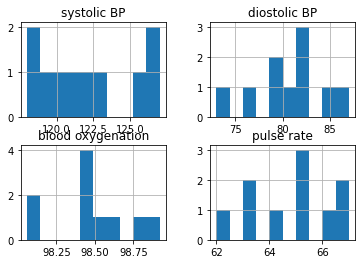

In [10]:
our_df.hist();

<AxesSubplot:>

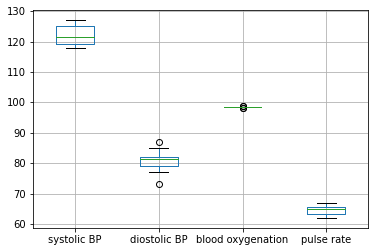

In [11]:
our_df.boxplot()

For a complete listing of what our data frame knows how to do, we can type `our_df.` and then hit the tab key.

Let's return to the `mean()` function, and see what, exactly, it is returning. We can do this by assigning the output to a variable and looking at its type.

In [12]:
our_means = our_df.mean()
type(our_means)

pandas.core.series.Series

So it is a pandas series, but, rather than the index being 0, 1, 2, 3, the *index values are actually the names of our variables*. 

If we want the mean pulse rate, *we can actually ask for it by name!*

In [13]:
our_means['pulse rate']

64.7

This introduces another key feature of pandas: **you can access data by name**.

## Accessing data

Accessing data by name is kind of a big deal. It makes code more readable and faster and easier to write.

So, for example, let's say we wanted the mean pulse rate for our patients. 

Using numpy, we would have to remember or figure our which column of our numpy array was pulse rate. And we'd have to remember that Python indexes start at 0. *And* we'd have to remember that we have to tell numpy to take the mean down the columns explicitly. Ha. 

So our code might look something like...

In [14]:
np_style_means = our_array.mean(axis=0)
pulse_mean = np_style_means[3]
pulse_mean

64.7

Compare that to something like:

In [15]:
our_means = our_df.mean()
our_means['pulse rate']

64.7

Or even:

In [16]:
our_df['pulse rate'].mean()

64.7

The pandas way makes it very clear what variable we are using and exactly what we are doing!

Let's look ot our litte data frame again.

In [17]:
our_df

,systolic BP,diostolic BP,blood oxygenation,pulse rate
0,127,82,98.45,65
1,127,85,98.50,64
2,118,77,98.49,65
3,126,81,98.61,62
4,121,82,98.41,63
5,119,82,98.06,67
6,122,87,98.83,65
7,120,79,98.92,66
8,118,79,98.11,67
9,123,73,98.49,63


### Accessing data using square brackets

We can grab a column (variable) by name if we want:

In [18]:
our_df['pulse rate']

0    65
1    64
2    65
3    62
4    63
5    67
6    65
7    66
8    67
9    63
Name: pulse rate, dtype: int64

We can grab as many columns as we want by using a list of column names.

In [19]:
needed_cols = ['diostolic BP', 'systolic BP']   # make a list
our_df[needed_cols]                             # use the list to grab columns

,diostolic BP,systolic BP
0,82,127
1,85,127
2,77,118
3,81,126
4,82,121
5,82,119
6,87,122
7,79,120
8,79,118
9,73,123


Or we could to it one step (although the double brackets might look a little confusing at first).

In [20]:
our_df[['diostolic BP', 'systolic BP']]  # the inner brackets define our list

,diostolic BP,systolic BP
0,82,127
1,85,127
2,77,118
3,81,126
4,82,121
5,82,119
6,87,122
7,79,120
8,79,118
9,73,123


### Getting data by indexing using loc[] and iloc[]

**Terminology Warning!** "Indexing" is a general term which means "accessing data by location". In pandas, as we have seen, objects like DataFrames also have an "index" which is a special column of row identifiers. So, in pandas, we can index data using column names (as above). And we can also index data using the row names, as we will see shortly.

Speaking of indexes, it's a little weird to have our patient IDs start at "0". Both because "patient zero" has a special meaning and also because it's just not intuitive to number a sequence of actual things starting at "0".

Fortunately, data frames allow you to customize their index column using the verb `set_index()`.

Let's set the index to start at 1 rather than 0:

In [21]:
my_ind = np.linspace(1, 10, 10)  # make a sequence from 1 to 10
my_ind = np.int64(my_ind)        # change it from decimal to integer (not really necessary, but...)
our_df.index = my_ind

In [23]:
our_df

,systolic BP,diostolic BP,blood oxygenation,pulse rate
1,127,82,98.45,65
2,127,85,98.50,64
3,118,77,98.49,65
4,126,81,98.61,62
5,121,82,98.41,63
6,119,82,98.06,67
7,122,87,98.83,65
8,120,79,98.92,66
9,118,79,98.11,67
10,123,73,98.49,63


In the section above, we saw that you can get columns of data our of a data frame using square brackets `[]`. Pandas data frames also know how to give you subsets of rows or row/column combinations.  

The primary method for accessing specific bits of data from a pandas data frame is with the loc[] verb.

### Accessing data using pd.DataFrame.loc[]

The loc[] verb provides an easy way to get rows of data based upon the index column. In other words, loc[] is the way we use the data frames index as an index!

So this will give us the data for patient number 3:

In [25]:
our_df.loc[3]

systolic BP          118.00
diostolic BP          77.00
blood oxygenation     98.49
pulse rate            65.00
Name: 3, dtype: float64

**Note!** The above call did **not** behave like a Python or numpy index! If it had, we would have gotten the data for patient number 4 because Python and numpy use *zero based indexing*. But using the `loc[]` function, we literally get what we asked for! Yay!

We can also *slice* out rows in chunks:

In [26]:
our_df.loc[3:6]

,systolic BP,diostolic BP,blood oxygenation,pulse rate
3,118,77,98.49,65
4,126,81,98.61,62
5,121,82,98.41,63
6,119,82,98.06,67


Which, again, gives us what we asked for without having to worry about the zero-based business.

But `.loc[]` also allows us to get specfic columns too

In [27]:
our_df.loc[3:6,'systolic BP':'blood oxygenation']

,systolic BP,diostolic BP,blood oxygenation
3,118,77,98.49
4,126,81,98.61
5,121,82,98.41
6,119,82,98.06


In summary, there are 3 main ways to get chunks of data out of a data frame "by name".

* square brackets (only) gives us columns, e.g. `new_df['systolic BP']`
* loc[] with one argument gives us rows, e.g. `new_df.loc['systolic BP']`
* loc[] with two arguments gives us row-column combinations, e.g. `new_df.loc[3,'systolic BP']`

Additionally, with `loc[]`, we can specify index ranges for the rows or columns or both, e.g. `new_df.loc[3:6,'systolic BP':'blood oxygenation']`

One final thing about using `loc[]` is that the index column doesn't have to be numbers. It can be date/time strings (as we'll see next time), or just plain strings.

Let's look at a summary of our data using the `describe()` method:

In [28]:
our_sum = our_df.describe()
our_sum

,systolic BP,diostolic BP,blood oxygenation,pulse rate
count,10.000000,10.000000,10.000000,10.000000
mean,122.100000,80.700000,98.487000,64.700000
std,3.541814,3.973523,0.269198,1.702939
min,118.000000,73.000000,98.060000,62.000000
25%,119.250000,79.000000,98.420000,63.250000
50%,121.500000,81.500000,98.490000,65.000000
75%,125.250000,82.000000,98.582500,65.750000
max,127.000000,87.000000,98.920000,67.000000


This looks suspiciously like a data frame except the index column looks like they're... er... not indexes. Let's see.

In [29]:
type(our_sum)

pandas.core.frame.DataFrame

Yep, it's a data frame! But let's see if that index column actually works:

In [30]:
our_sum.loc['mean']

systolic BP          122.100
diostolic BP          80.700
blood oxygenation     98.487
pulse rate            64.700
Name: mean, dtype: float64

In [31]:
our_sum.loc['count':'std']

,systolic BP,diostolic BP,blood oxygenation,pulse rate
count,10.000000,10.000000,10.000000,10.000000
mean,122.100000,80.700000,98.487000,64.700000
std,3.541814,3.973523,0.269198,1.702939


In [32]:
our_sum.loc['count':'std', 'systolic BP':'diostolic BP']

,systolic BP,diostolic BP
count,10.000000,10.000000
mean,122.100000,80.700000
std,3.541814,3.973523


### Accessing data using pd.DataFrame.iloc[]

In [33]:
our_df.iloc[2, 0:1]

systolic BP    118.0
Name: 3, dtype: float64

## Non-numerical information (categories or factors)

In [34]:
num_patients = 20    # specify the number of patients

# make some simulated data 
sys_bp = np.int64(125 + 5*np.random.randn(num_patients,))
dia_bp = np.int64(80 + 5*np.random.randn(num_patients,))
b_oxy = np.round(98.5 + 0.3*np.random.randn(num_patients,), 2)
pulse = np.int64(65 + 2*np.random.randn(num_patients,))


In [35]:
diabetic = pd.Series(['yes', 'no'])  # make the short series
diabetic = diabetic.repeat(num_patients/2)       # repeat each over two cell's worth of data
diabetic = diabetic.reset_index(drop=True)      # reset the series's index value

In [36]:
gender = pd.Series(['male', 'female'])             # make the short series
gender = gender.repeat(num_patients/4)                 # repeat each over one cell's worth of data
gender = pd.concat([gender]*2, ignore_index=True)   # stack or "concatenate" two copies

In [37]:
# Make a dictionary with a "key" for each variable name, and 
# the "values" being the num_patients long data vectors
df_dict = {'systolic BP' : sys_bp,
           'diostolic BP' : dia_bp,
           'blood oxygenation' : b_oxy,
           'pulse rate' : pulse,
           'gender': gender,
           'diabetes': diabetic
           }
    
new_df = pd.DataFrame(df_dict)    # Now make a data frame out of the dictionary

In [38]:
colname = 'patient '
my_index = []
for i in range(1, num_patients+1) :
    my_index.append(colname + str(i))

In [39]:
type(my_index)

list

In [40]:
new_df.index = my_index

In [41]:
new_df

,systolic BP,diostolic BP,blood oxygenation,pulse rate,gender,diabetes
patient 1,127,78,98.67,66,male,yes
patient 2,129,89,98.90,64,male,yes
patient 3,128,80,98.66,66,male,yes
patient 4,131,78,98.35,62,male,yes
patient 5,117,86,98.40,64,male,yes
patient 6,115,81,98.59,65,female,yes
patient 7,128,78,98.33,65,female,yes
patient 8,134,78,98.16,63,female,yes
patient 9,114,71,98.56,66,female,yes
patient 10,122,83,98.76,66,female,yes


### Computing within groups

## Logical indexing

In [90]:
our_df['systolic BP'] > 125

0     True
1     True
2     True
3    False
4    False
5    False
6    False
7    False
8     True
9     True
Name: systolic BP, dtype: bool

Access by patient ID

In [ ]:
import seaborn as sns